In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from datetime import datetime

In [10]:
now =  datetime.now().strftime('%Y-%m-%d')
aapl = yf.download("AAPL", start= "2020-01-01", end= now)
aapl = aapl["Close"]
aapl

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
2020-01-08,75.797501
...,...
2024-12-17,253.479996
2024-12-18,248.050003
2024-12-19,249.789993


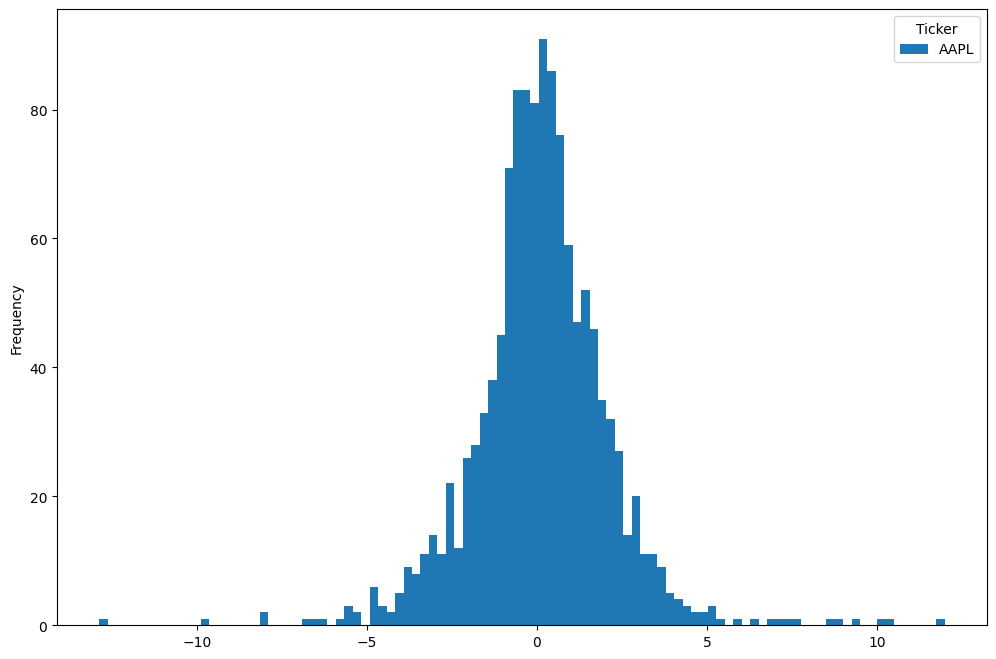

In [11]:
ret = aapl.pct_change().dropna()
ret = ret * 100
ret.plot(kind='hist',figsize=(12,8), bins=100)
plt.show()

In [12]:
daily_mean_ret = ret.mean()
var_daily=ret.var()
std_daily=np.sqrt(var_daily)
annual_mean_ret=daily_mean_ret*252
var_annual_ret=var_daily*252
annual_std_ret = np.sqrt(var_annual_ret)
print("Daily_mean is : " ,daily_mean_ret.values)
print("Var_daily is : " ,var_daily.values)
print("Std_daily is : " ,std_daily.values)
print("Annual_mean is : ",annual_mean_ret.values)
print("Var_annual_is:",var_annual_ret.values)
print("annual_std_return is : ",annual_std_ret.values)

Daily_mean is :  [0.11771834]
Var_daily is :  [3.99403414]
Std_daily is :  [1.99850798]
Annual_mean is :  [29.66502174]
Var_annual_is: [1006.49660273]
annual_std_return is :  [31.72533062]


[*********************100%***********************]  8 of 8 completed


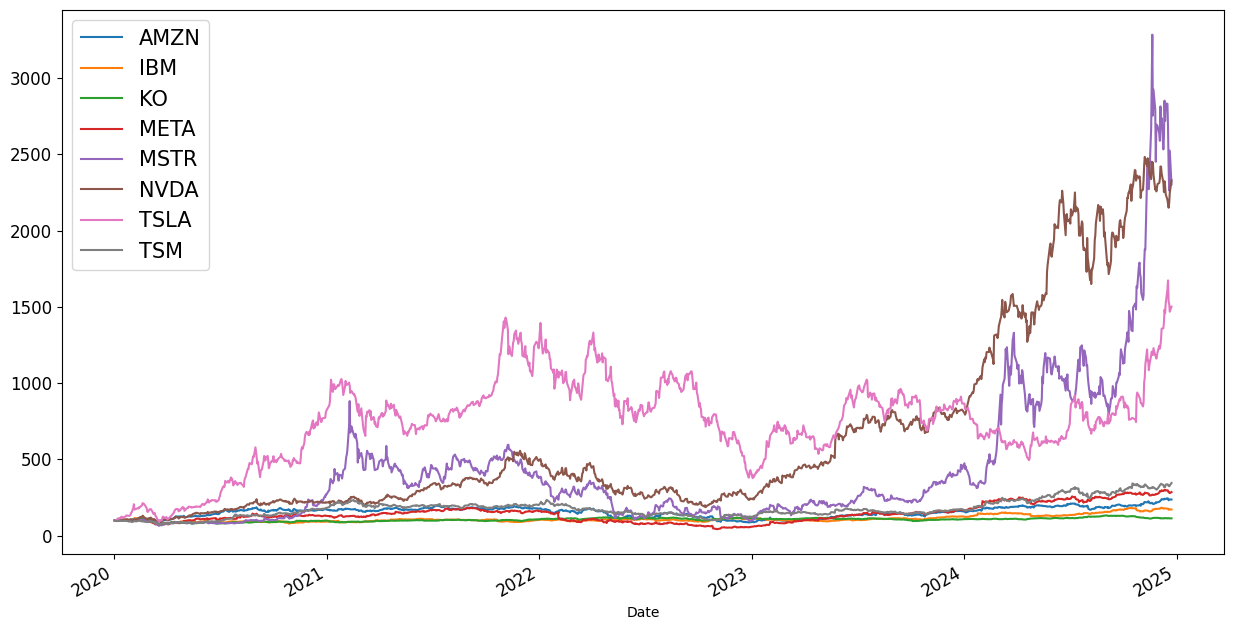

In [13]:
# Nvidia, Tesla, TSMC, Micro strategie, Meta(Faceboock), amazon
ticker = ["NVDA","TSLA","TSM","MSTR","META","AMZN","KO","IBM"]
now = datetime.now().strftime('%Y-%m-%d')
stocks = yf.download(ticker , start="2020-01-01", end = now)
stocks = stocks['Close']
stocks = stocks.div(stocks.iloc[0]).mul(100)
stocks.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=15)
plt.show()

In [20]:
ret=stocks.pct_change().dropna()
summary = ret.describe().T.loc[:,["mean","std"]]
summary["mean"]=summary["mean"]*252
summary["std"]=summary["std"]*np.sqrt(252)
summary

,mean,std
Ticker,,
AMZN,0.238643,0.360120
IBM,0.144892,0.269020
KO,0.047245,0.208511
META,0.313956,0.449753
MSTR,1.056252,0.924866
NVDA,0.778594,0.539618
TSLA,0.770251,0.671550
TSM,0.323230,0.384983


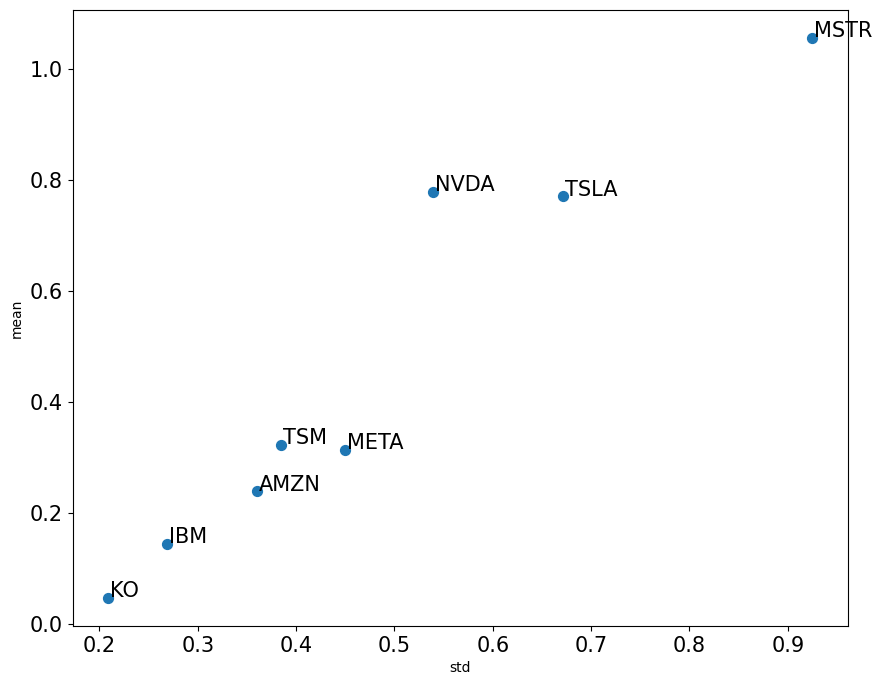

In [25]:
summary.plot.scatter(x="std",y="mean",figsize=(10,8),s=50,fontsize=15)
for i in summary.index:
    plt.annotate(i,xy=(summary.loc[i,"std"]+0.002,summary.loc[i,"mean"]+0.002),size=15)
plt.xlabel("Annual risk")